In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
data = pd.read_csv('./dat', encoding='utf-8', sep=',') # data read

In [216]:
print(data.shape) # size of data

(52500, 74)


In [217]:
print(data.iloc[:, 0:10].head(10))
print("="*50)
print(data.iloc[:, 10:20].head(10))
print("="*50)
print(data.iloc[:, 20:30].head(10))
print("="*50)
print(data.iloc[:, 30:40].head(10))
print("="*50)
print(data.iloc[:, 40:50].head(10))
print("="*50)
print(data.iloc[:, 50:60].head(10))
print("="*50)
print(data.iloc[:, 60:70].head(10))
print("="*50)
print(data.iloc[:, 70:75].head(10))

   y  x0_age  x1_term  x2_sex  x3  x4  x5  x6  x7  x8
0  1    22.0        0       2  10   1   0  99  99  99
1  1    49.0       36       2  10   1   8   1  99  99
2  1    22.0       13       1  10   1   6   1  99  99
3  1    34.0       24       1  10   2   0  99  99  99
4  1    26.0       97       1  32   1  10   1  99  99
5  1    51.0      143       1  10   1   9   1  99  99
6  0    22.0       39       2  33   2   0  99  99  99
7  0    40.0      157       2  10   1   0  99   1  99
8  0    47.0      218       1  10   1   0  99  99  99
9  0    41.0       13       2  10   2   0  99  99  99
  x9   x10  x11  x12  x13  x14  x15  x16  x17  x18
0  T  22.0   99   99   99    2    2    2    1    2
1  K  46.0    4    4    4    2    2    1    2    2
2  T  21.0   99    2    5    2    2    2    2    2
3  K  32.0   99    2    5    2    2    2    2    2
4  Q  18.0   99    4    4    2    2    1    1    2
5  K  31.0   99    2    5    2    2    2    2    2
6  T  19.0   99    4    4    2    2    1    1    

In [218]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
categorical_feats = data.dtypes[data.dtypes == "object"].index
print(numerical_feats)
print("="*50)
print(categorical_feats)

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72'],
      dtype='object')
Index(['x9'], dtype='object')


In [219]:
print('unique values of {0}：{1}'.format(data.columns[15], data.iloc[:, 15].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[19], data.iloc[:, 19].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[20], data.iloc[:, 20].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[22], data.iloc[:, 22].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[23], data.iloc[:, 23].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[24], data.iloc[:, 24].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[28], data.iloc[:, 28].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[29], data.iloc[:, 29].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[30], data.iloc[:, 30].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[31], data.iloc[:, 31].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[32], data.iloc[:, 32].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[34], data.iloc[:, 34].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[35], data.iloc[:, 35].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[36], data.iloc[:, 36].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[37], data.iloc[:, 37].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[38], data.iloc[:, 38].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[39], data.iloc[:, 39].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[41], data.iloc[:, 41].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[47], data.iloc[:, 47].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[48], data.iloc[:, 48].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[49], data.iloc[:, 49].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[50], data.iloc[:, 50].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[51], data.iloc[:, 51].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[52], data.iloc[:, 52].unique())) # single ?
print('unique values of {0}：{1}'.format(data.columns[73], data.iloc[:, 73].unique())) # single ?

unique values of x14：[2]
unique values of x18：[2]
unique values of x19：[2]
unique values of x21：[2]
unique values of x22：[2]
unique values of x23：[2]
unique values of x27：[2]
unique values of x28：[2]
unique values of x29：[2]
unique values of x30：[2]
unique values of x31：[2]
unique values of x33：[2]
unique values of x34：[2]
unique values of x35：[2]
unique values of x36：[2]
unique values of x37：[2]
unique values of x38：[2]
unique values of x40：[99]
unique values of x46：[2]
unique values of x47：[2]
unique values of x48：[2]
unique values of x49：[2]
unique values of x50：[2]
unique values of x51：[2]
unique values of x72：[0]


In [220]:
print('unique values of {0}：{1}'.format(data.columns[0], data.iloc[:, 0].unique())) # y
print('unique values of {0}：{1}'.format(data.columns[5], data.iloc[:, 5].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[16], data.iloc[:, 16].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[17], data.iloc[:, 17].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[18], data.iloc[:, 18].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[21], data.iloc[:, 21].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[25], data.iloc[:, 25].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[26], data.iloc[:, 26].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[27], data.iloc[:, 27].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[45], data.iloc[:, 45].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[53], data.iloc[:, 53].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[54], data.iloc[:, 54].unique())) # binary
print('unique values of {0}：{1}'.format(data.columns[55], data.iloc[:, 55].unique())) # binary

unique values of y：[1 0]
unique values of x4：[1 2]
unique values of x15：[2 1]
unique values of x16：[2 1]
unique values of x17：[1 2]
unique values of x20：[1 2]
unique values of x24：[2 1]
unique values of x25：[2 1]
unique values of x26：[2 1]
unique values of x44：[99  1]
unique values of x52：[2 1]
unique values of x53：[2 1]
unique values of x54：[2 1]


In [221]:
print('unique values of {0}：{1}'.format(data.columns[3], data.iloc[:, 3].unique())) # 3 values
print('unique values of {0}：{1}'.format(data.columns[44], data.iloc[:, 44].unique())) # 3 values
print('unique values of {0}：{1}'.format(data.columns[40], data.iloc[:, 40].unique())) # 3 values
print("="*50)
print('unique values of {0}：{1}'.format(data.columns[7], data.iloc[:, 7].unique())) # 4 values
print('unique values of {0}：{1}'.format(data.columns[8], data.iloc[:, 8].unique())) # 4 values
print('unique values of {0}：{1}'.format(data.columns[9], data.iloc[:, 9].unique())) # 4 values
print('unique values of {0}：{1}'.format(data.columns[33], data.iloc[:, 33].unique())) # 4 values
print('unique values of {0}：{1}'.format(data.columns[46], data.iloc[:, 46].unique())) # 4 values
print("="*50)
print('unique values of {0}：{1}'.format(data.columns[12], data.iloc[:, 12].unique())) # 5 values
print('unique values of {0}：{1}'.format(data.columns[13], data.iloc[:, 13].unique())) # 5 values
print("="*50)
print('unique values of {0}：{1}'.format(data.columns[42], data.iloc[:, 42].unique())) # 5 values
print('unique values of {0}：{1}'.format(data.columns[43], data.iloc[:, 43].unique())) # 5 values
print('unique values of {0}：{1}'.format(data.columns[58], data.iloc[:, 58].unique())) # 5 values
print("="*50)
print('unique values of {0}：{1}'.format(data.columns[14], data.iloc[:, 14].unique())) # 6 values
print('unique values of {0}：{1}'.format(data.columns[56], data.iloc[:, 56].unique())) # 6 valeus

unique values of x2_sex：[ 2  1 99]
unique values of x43：[99  1  2]
unique values of x39：[ 2  1 99]
unique values of x6：[99  1  3  2]
unique values of x7：[99  1  2  3]
unique values of x8：[99  1  2]
unique values of x32：[ 2 99  1  3]
unique values of x45：[99  3  1  2]
unique values of x11：[99  4  3  1  2]
unique values of x12：[99  4  2  1  3]
unique values of x41：[ 1 99  0 51 61]
unique values of x42：[99  1  3  2  4]
unique values of x57：[ 2  3  4 90  1]
unique values of x13：[99  4  5  1  3  2]
unique values of x55：[99  3  4  2  5  1]


In [222]:
# complex
print('unique values of {0}：{1}'.format(data.columns[1], data.iloc[:, 1].unique())) # x0_age
print('unique values of {0}：{1}'.format(data.columns[2], data.iloc[:, 2].unique())) # x1_term
# print('unique values of {0}：{1}'.format(data.columns[57], data.iloc[:, 57].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[59], data.iloc[:, 59].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[60], data.iloc[:, 60].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[61], data.iloc[:, 61].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[62], data.iloc[:, 62].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[63], data.iloc[:, 63].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[64], data.iloc[:, 64].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[65], data.iloc[:, 65].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[66], data.iloc[:, 66].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[67], data.iloc[:, 67].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[68], data.iloc[:, 68].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[69], data.iloc[:, 69].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[70], data.iloc[:, 70].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[71], data.iloc[:, 71].unique())) # 
# print('unique values of {0}：{1}'.format(data.columns[72], data.iloc[:, 72].unique())) # 

unique values of x0_age：[ 22.  49.  34.  26.  51.  40.  47.  41.  32.  46.  33.  10.  27.  64.
  28.  37.  21.  57.  19.  nan  44.  31.  53.  58.  16.  23.  24.  83.
  20.  59.  29.  36.  45.  25.  72.  18.  35.  67.  38.  60.  54.  42.
  43.  61.  30.  69.  62.   7.  39.  48.   3.  66.  50.  63.  55.  56.
  68.   5.  71.  52.  17.   2.  70.  65.  15.  74.   9.  13.  14.   4.
  11.  79.  12.  78.   6.  73.  77.   1.  82.   8.  89.  87.  75.  81.
  85.  76.  92.  80.  84.  86.  90.   0. 100.  88.]
unique values of x1_term：[  0  36  13  24  97 143  39 157 218  14 117  11   6  44 163  43  80 110
  12  76  15 123  60   9  92  29   8  48  75 113 205  35  59  18  50  66
  79 145  37  26  10  42 211 200  56 210  49  71  19  73 175  82   4  72
  87   1  16  40  89 107  32   3   2  58  38   5  83  69  94 141 116 105
  33 168  67 115  23  74 120  20  52  22 181 108 164  17 100 102  25  68
   7 109 140 207  95  46 132 198  90 125 231  64  41  21 227  77 180  53
 183 127  91  96  31  70 208  86 13

In [223]:
pd.set_option('display.max_rows', 500)
data['x9'].value_counts()

T    22518
K     8506
C     6926
Q     4973
H     3050
N     2642
D     1907
S     1009
R      969
Name: x9, dtype: int64

In [224]:
print(data.info()) # dtype, non-null cnt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 74 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        52500 non-null  int64  
 1   x0_age   51750 non-null  float64
 2   x1_term  52500 non-null  int64  
 3   x2_sex   52500 non-null  int64  
 4   x3       52500 non-null  int64  
 5   x4       52500 non-null  int64  
 6   x5       52500 non-null  int64  
 7   x6       52500 non-null  int64  
 8   x7       52500 non-null  int64  
 9   x8       52500 non-null  int64  
 10  x9       52500 non-null  object 
 11  x10      51808 non-null  float64
 12  x11      52500 non-null  int64  
 13  x12      52500 non-null  int64  
 14  x13      52500 non-null  int64  
 15  x14      52500 non-null  int64  
 16  x15      52500 non-null  int64  
 17  x16      52500 non-null  int64  
 18  x17      52500 non-null  int64  
 19  x18      52500 non-null  int64  
 20  x19      52500 non-null  int64  
 21  x20      525

In [225]:
# pd.set_option('display.max_rows', 500) # float
# data['x0_age'].value_counts()

In [226]:
# pd.set_option('display.max_rows', 500) # float
# data['x10'].value_counts()

In [227]:
print(round(data.iloc[:, :5].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 5:10].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 10:16].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 16:21].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 21:26].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 26:31].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 31:36].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 36:41].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 41:46].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 46:51].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 51:56].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 56:61].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 61:66].describe(),3)) # basic statistics
print("="*50)
print(round(data.iloc[:, 66:71].describe(),3)) # basic statistics

               y     x0_age    x1_term     x2_sex         x3
count  52500.000  51750.000  52500.000  52500.000  52500.000
mean       0.048     35.916     70.307      2.904     21.508
std        0.213     13.067     62.789     11.579     23.348
min        0.000      0.000      0.000      1.000     10.000
25%        0.000     26.000     18.000      1.000     10.000
50%        0.000     34.000     55.000      2.000     10.000
75%        0.000     44.000    104.000      2.000     31.000
max        1.000    100.000    268.000     99.000     99.000
              x4         x5         x6         x7         x8
count  52500.000  52500.000  52500.000  52500.000  52500.000
mean       1.443      1.394     74.674     96.304     92.120
std        0.497      3.069     42.166     16.017     25.037
min        1.000      0.000      1.000      1.000      1.000
25%        1.000      0.000     99.000     99.000     99.000
50%        1.000      0.000     99.000     99.000     99.000
75%        2.000      0.

In [228]:
# statistics visual

0    50000
1     2500
Name: y, dtype: int64

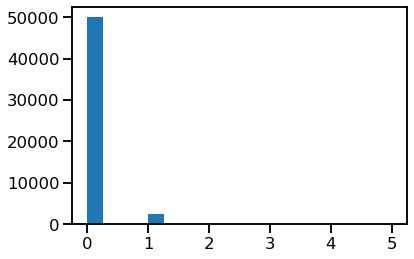

In [229]:
plt.hist(df['y'], bins=20, range=(0,5))
data['y'].value_counts()

(array([1.480e+02, 1.980e+02, 4.110e+02, 2.605e+03, 7.553e+03, 8.216e+03,
        7.215e+03, 6.590e+03, 5.937e+03, 4.759e+03, 3.212e+03, 2.128e+03,
        1.339e+03, 9.020e+02, 2.930e+02, 1.550e+02, 6.500e+01, 2.100e+01,
        2.000e+00, 1.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

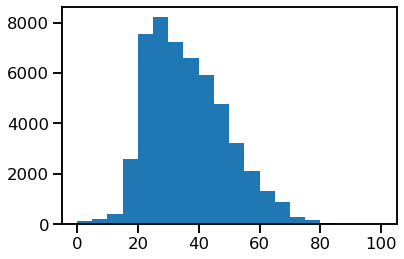

In [230]:
plt.hist(df['x0_age'], bins=20, range=(0,100))

(array([10869.,  5968.,  4258.,  4620.,  5260.,  4650.,  2441.,  1992.,
         2043.,  1159.,  1355.,  1296.,  1368.,  1331.,  1287.,  1112.,
          774.,   438.,   252.,    27.]),
 array([  0. ,  13.5,  27. ,  40.5,  54. ,  67.5,  81. ,  94.5, 108. ,
        121.5, 135. , 148.5, 162. , 175.5, 189. , 202.5, 216. , 229.5,
        243. , 256.5, 270. ]),
 <BarContainer object of 20 artists>)

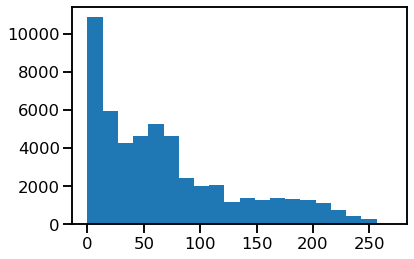

In [231]:
plt.hist(df['x1_term'], bins=20, range=(0,270))

2     26453
1     25297
99      750
Name: x2_sex, dtype: int64

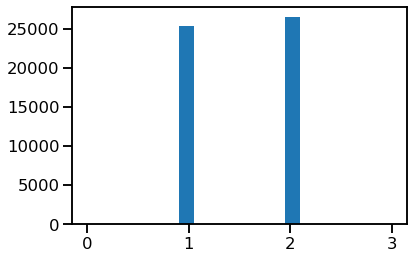

In [232]:
plt.hist(df['x2_sex'], bins=20, range=(0,3))
data['x2_sex'].value_counts()

(array([51750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   750.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

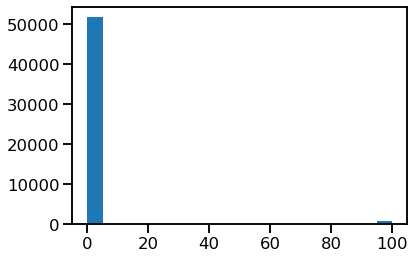

In [233]:
plt.hist(df['x2_sex'], bins=20, range=(0, 100))

In [234]:
# correlation

In [235]:
data[["y", "x0_age"]].corr()

,y,x0_age
y,1.000000,-0.028118
x0_age,-0.028118,1.000000


In [236]:
data[["y", "x1_term"]].corr()

,y,x1_term
y,1.000000,-0.139612
x1_term,-0.139612,1.000000


In [237]:
data[["y", "x2_sex"]].corr()

,y,x2_sex
y,1.000000,0.052961
x2_sex,0.052961,1.000000


In [238]:
data[["x0_age", "x1_term"]].corr()

,x0_age,x1_term
x0_age,1.000000,0.218331
x1_term,0.218331,1.000000


In [239]:
data[["x0_age", "x2_sex"]].corr()

,x0_age,x2_sex
x0_age,1.000000,-0.018795
x2_sex,-0.018795,1.000000


In [240]:
data[["x1_term", "x2_sex"]].corr()

,x1_term,x2_sex
x1_term,1.000000,-0.047369
x2_sex,-0.047369,1.000000


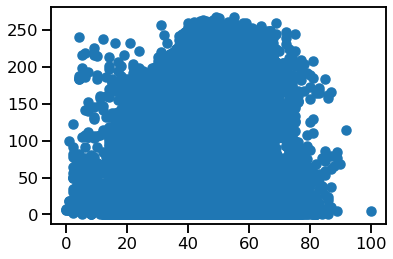

In [241]:
plt.scatter(x="x0_age", y="x1_term", data=df)

<AxesSubplot:xlabel='x2_sex', ylabel='x1_term'>

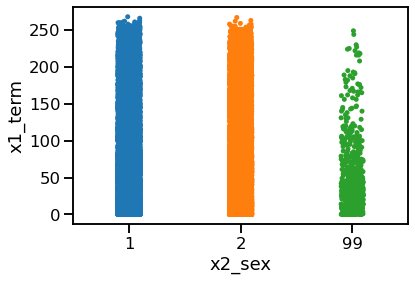

In [242]:
# sns.swarmplot(x="x2_sex", y="x1_term", hue="x2_sex", data=data)
# sns.swarmplot(x="x2_sex", y="x1_term", data=data)
sns.stripplot(x="x2_sex", y="x1_term", data=data)

<AxesSubplot:xlabel='x2_sex', ylabel='x1_term'>

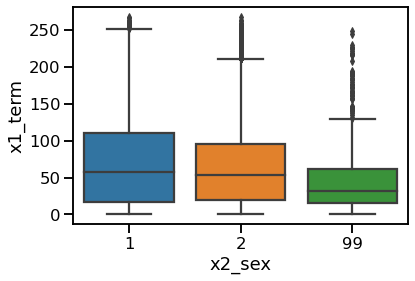

In [243]:
sns.boxplot(x="x2_sex", y="x1_term", data=data)

<AxesSubplot:xlabel='x2_sex', ylabel='x1_term'>

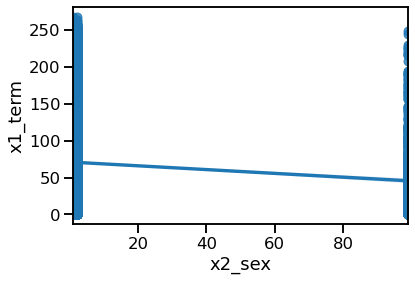

In [244]:
# linear regression
sns.regplot(x="x2_sex", y="x1_term", data=data)

In [245]:
# set dummies
df = pd.get_dummies(data.drop(columns=['x71']), drop_first=True) # dummy_na=True
# df.columns

In [246]:
# 相関行列、相関性評価
pd.set_option('display.max_columns', 72) # float
corr_matrix = df.corr(method='pearson') # kendall, spearman
# data_corr = data.corr()
corr_matrix

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x72,x9_D,x9_H,x9_K,x9_N,x9_Q,x9_R,x9_S,x9_T
y,1.000000,-0.028118,-0.139612,0.052961,0.060146,-0.071414,0.141337,-0.137543,0.015804,0.004739,0.005159,0.013533,0.041599,0.027372,NaN,0.015867,0.008022,0.000009,NaN,NaN,0.028109,NaN,NaN,NaN,0.007752,0.028333,0.009750,NaN,NaN,NaN,NaN,NaN,-0.009009,NaN,NaN,NaN,...,0.167800,0.174349,NaN,NaN,NaN,NaN,NaN,NaN,-0.007823,-0.004361,-0.001429,-0.022399,-0.105630,-0.029269,-0.039634,-0.039843,-0.012985,0.018514,-0.011890,0.045575,0.098438,0.023640,-0.023992,0.097173,0.038659,-0.003576,-0.036780,NaN,-0.003733,-0.009268,-0.012391,-0.009332,0.000669,-0.007405,-0.007197,0.033201
x0_age,-0.028118,1.000000,0.218331,-0.018795,0.039411,-0.060988,-0.029290,0.060868,0.001103,0.014810,0.654735,0.004990,0.026213,0.017588,NaN,0.019786,-0.063562,0.000840,NaN,NaN,-0.053337,NaN,NaN,NaN,-0.019757,-0.022808,-0.022985,NaN,NaN,NaN,NaN,NaN,0.061218,NaN,NaN,NaN,...,0.085537,0.062126,NaN,NaN,NaN,NaN,NaN,NaN,-0.244978,-0.054380,0.008272,-0.131616,0.043387,0.000575,0.024444,0.072816,0.060413,0.095118,-0.022493,-0.071166,0.006592,0.087308,0.101301,-0.114620,-0.004519,0.054471,0.110482,NaN,0.012967,0.004412,0.002474,0.015991,-0.004643,-0.005700,0.003107,-0.021347
x1_term,-0.139612,0.218331,1.000000,-0.047369,0.227346,-0.496571,0.032557,0.012942,-0.180707,-0.061228,-0.214250,-0.260510,-0.265010,-0.254840,NaN,-0.011559,0.062159,-0.184178,NaN,NaN,-0.149281,NaN,NaN,NaN,-0.087313,-0.069894,-0.038414,NaN,NaN,NaN,NaN,NaN,-0.075035,NaN,NaN,NaN,...,-0.232073,-0.228487,NaN,NaN,NaN,NaN,NaN,NaN,-0.044376,0.085404,-0.011894,-0.017797,0.687055,-0.008843,-0.007018,0.076054,0.084022,0.090061,0.042803,0.009576,-0.049619,0.078555,0.081827,0.013908,0.040230,0.010462,0.010787,NaN,-0.005490,0.041816,-0.002197,0.039661,-0.018608,0.035465,0.007226,-0.107558
x2_sex,0.052961,-0.018795,-0.047369,1.000000,0.158724,-0.024902,-0.036503,0.038952,0.014570,0.000168,0.003694,-0.015469,0.047387,0.025570,NaN,-0.000537,0.024088,0.083974,NaN,NaN,0.070719,NaN,NaN,NaN,-0.023256,0.014242,0.009198,NaN,NaN,NaN,NaN,NaN,0.007218,NaN,NaN,NaN,...,0.136317,0.104499,NaN,NaN,NaN,NaN,NaN,NaN,-0.011733,-0.003046,-0.016745,-0.029138,-0.052625,0.227959,-0.064525,-0.035112,-0.009387,-0.014012,0.041259,0.019974,0.015617,-0.019461,0.003745,-0.029737,0.051804,0.090581,0.108239,NaN,-0.011673,-0.010174,-0.024140,-0.011927,-0.017571,-0.009384,-0.005967,0.057742
x3,0.060146,0.039411,0.227346,0.158724,1.000000,-0.218458,0.026209,-0.011505,-0.003416,-0.007481,-0.104704,0.003943,-0.021299,-0.028183,NaN,0.007236,0.015594,-0.037265,NaN,NaN,-0.012520,NaN,NaN,NaN,-0.024495,-0.001896,-0.003223,NaN,NaN,NaN,NaN,NaN,-0.000283,NaN,NaN,NaN,...,0.042675,0.037878,NaN,NaN,NaN,NaN,NaN,NaN,-0.044106,0.031946,-0.007261,-0.016432,0.120899,0.109394,-0.003601,-0.007602,0.016517,0.010829,0.083893,0.039549,0.000622,-0.006897,0.022163,-0.101695,0.022304,0.069118,0.050980,NaN,0.003832,-0.032672,-0.028042,0.105443,0.045897,-0.032394,0.017934,-0.001105
x4,-0.071414,-0.060988,-0.496571,-0.024902,-0.218458,1.000000,-0.110198,0.082919,0.110314,0.022799,0.137801,0.263883,0.129837,0.144549,NaN,-0.022637,-0.033840,0.130987,NaN,NaN,0.096356,NaN,NaN,NaN,0.035927,0.020602,0.014573,NaN,NaN,NaN,NaN,NaN,0.035098,NaN,NaN,NaN,...,0.010847,0.036707,NaN,NaN,NaN,NaN,NaN,NaN,0.063189,-0.069219,0.010483,-0.062652,-0.397859,-0.017221,0.006854,0.057160,0.040418,-0.002675,0.044704,-0.071680,0.015712,0.029205,0.001295,-0.033480,0.050479,0.071379,0.063277,NaN,-0.000388,-0.035947,-0.004742,-0.035173,0.004678,-0.028293,0.001107,0.108502
x5,0.141337,-0.029290,0.032557,-0.036503,0.026209,-0.110198,1.000000,-0.790922,0.015324,0.005010,-0.068206,0.029079,-0.087404,-0.082835,NaN,0.008522,0.105066,-0.113829,NaN,NaN,-0.073629,NaN,NaN,NaN,-0.000630,0.022378,-0.021567,NaN,NaN,NaN,NaN,Na

In [247]:
corr_y = pd.DataFrame({'features': df.columns, 'corr_y': corr_matrix['y']}, index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

# y 相関
# x1_term : -0.139612
# x5   : 0.141337	
# x6  : -0.137543
# x42 : 0.167490
# x43 : 0.178006
# x44 : 0.167800
# x45 : 0.174349
# x56 : 0.098438

# NaN : x14, 18, 19, 21, 22, 23, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37 ,38, 40, 46, 47, 48, 49, 50, 51, 72

,features,corr_y
0,y,1.000000
1,x0_age,-0.028118
2,x1_term,-0.139612
3,x2_sex,0.052961
4,x3,0.060146
5,x4,-0.071414
6,x5,0.141337
7,x6,-0.137543
8,x7,0.015804
9,x8,0.004739


In [248]:
#相関係数の絶対値をとって、閾値と比較する
select_cols = corr_y[corr_y["corr_y"].abs()>0.1] # 0.1 低い？
select_cols

,features,corr_y
0,y,1.000000
2,x1_term,-0.139612
6,x5,0.141337
7,x6,-0.137543
42,x42,0.167490
43,x43,0.178006
44,x44,0.167800
45,x45,0.174349
56,x56,-0.105630


In [249]:
# ランダム・フォレストによる相互作用評価
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='y')
y = df['y']
print(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
train_y = sc.transform(train_y)

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(train_X, test_X)

pred_y = classifier.predict(test_X)
cm = confusion_matrix(test_y, pred_y)
accuracy_score(test_y, pred_y)

       x0_age  x1_term  x2_sex  x3  x4  x5  x6  x7  x8   x10  x11  x12  x13  \
0        22.0        0       2  10   1   0  99  99  99  22.0   99   99   99   
1        49.0       36       2  10   1   8   1  99  99  46.0    4    4    4   
2        22.0       13       1  10   1   6   1  99  99  21.0   99    2    5   
3        34.0       24       1  10   2   0  99  99  99  32.0   99    2    5   
4        26.0       97       1  32   1  10   1  99  99  18.0   99    4    4   
...       ...      ...     ...  ..  ..  ..  ..  ..  ..   ...  ...  ...  ...   
52495    26.0       11       1  10   2   0  99  99  99  25.0   99    2    5   
52496    32.0       26       2  10   2   0  99  99  99  29.0   99    2    5   
52497    59.0       84       2  10   2   0  99  99  99  52.0   99    2    5   
52498    16.0        8       2  10   2   0  99  99  99  45.0   99   99   99   
52499    22.0      116       1  10   1   0  99  99  99  22.0    3    2    5   

       x14  x15  x16  x17  x18  x19  x20  x21  x22 

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 1. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [250]:
# sns.set_context("talk")
# fig = plt.subplots(figsize=(100, 100))
# sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='Blues', square=True)

In [251]:
# all distribution
# sns.pairplot(data_corr)

In [252]:
# 特徴量選択は、目的変数との相関係数が0.X以上とする？

In [253]:
# missing value(null) count and percentage
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
x71,52460,0.999238
x70,52274,0.995695
x69,52274,0.995695
x68,52274,0.995695
x67,52274,0.995695
x62,52119,0.992743
x59,51732,0.985371
x60,51732,0.985371
x61,51732,0.985371
x58,51732,0.985371


In [254]:
# data[''] = data[''].replace({'':1 ,'':0})

In [255]:
# set dummies
df = pd.get_dummies(data.drop(columns=['x71']), drop_first=True) # dummy_na=True
# df.columns

In [256]:
# comlement missing values 
df2 = df.copy()
df2['x58'] = df['x58'].fillna(0)
df2['x59'] = df['x59'].fillna(0)
df2['x60'] = df['x60'].fillna(0)
df2['x61'] = df['x61'].fillna(0)
df2['x62'] = df['x62'].fillna(0)
df2['x63'] = df['x63'].fillna(0)
df2['x64'] = df['x64'].fillna(0)
df2['x65'] = df['x65'].fillna(0)
df2['x66'] = df['x66'].fillna(0)
df2['x67'] = df['x67'].fillna(0)
df2['x68'] = df['x68'].fillna(0)
df2['x69'] = df['x69'].fillna(0)
df2['x70'] = df['x70'].fillna(0)

In [257]:
# print(df2.info())

In [258]:
# Data divide
df_X = df2.drop(columns='y') # all variable
# df_X = df2.iloc[:, 10:11] #  only
# df_X = df2['x0_age'] #  only
# df_X = df2['x1_term'] #  only
# df_X = df2['x2_sex'] #  only
# df_X = df2['x10'] #  only
# df_X = df2['x5'] #  only
# df_X = df2['x56'] #  only
print(df_X.head(3))

df_y = df2['y']
# print(df_y.head(3))

   x0_age  x1_term  x2_sex  x3  x4  x5  x6  x7  x8   x10  x11  x12  x13  x14  \
0    22.0        0       2  10   1   0  99  99  99  22.0   99   99   99    2   
1    49.0       36       2  10   1   8   1  99  99  46.0    4    4    4    2   
2    22.0       13       1  10   1   6   1  99  99  21.0   99    2    5    2   

   x15  x16  x17  x18  x19  x20  x21  x22  x23  x24  x25  x26  x27  x28  x29  \
0    2    2    1    2    2    1    2    2    2    2    2    2    2    2    2   
1    2    1    2    2    2    1    2    2    2    2    2    2    2    2    2   
2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2   

   x30  x31  x32  x33  x34  x35  x36  ...  x44  x45  x46  x47  x48  x49  x50  \
0    2    2    2    2    2    2    2  ...   99   99    2    2    2    2    2   
1    2    2   99    2    2    2    2  ...    1    3    2    2    2    2    2   
2    2    2    2    2    2    2    2  ...   99   99    2    2    2    2    2   

   x51  x52  x53  x54  x55  x56  x57 

In [259]:
# 内部のハイパーパラメータの動きはどうなっている？
# バリエーションデータ作成目的を説明できる？
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [260]:
# Create dataset
lgb_train = lgb.Dataset(X_train_val, y_train_val)
lgb_val = lgb.Dataset(X_val, y_val)

In [261]:
# 説明できる？
param = {'metric': 'auc', 'objective': 'binary'}

In [262]:
# modeling
model = lgb.train(param, lgb_train, valid_sets=lgb_val)

[LightGBM] [Info] Number of positive: 1601, number of negative: 31999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 33600, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047649 -> initscore=-2.995076
[LightGBM] [Info] Start training from score -2.995076
[1]	valid_0's auc: 0.842683
[2]	valid_0's auc: 0.848813
[3]	valid_0's auc: 0.859103
[4]	valid_0's auc: 0.86081
[5]	valid_0's auc: 0.864861
[6]	valid_0's auc: 0.865698
[7]	valid_0's auc: 0.867238
[8]	valid_0's auc: 0.86867
[9]	valid_0's auc: 0.87144
[10]	valid_0's auc: 0.871771
[11]	valid_0's auc: 0.872181
[12]	valid_0's auc: 0.873908
[13]	valid_0's auc: 0.874599
[14]	valid_0's auc: 0.876112
[15]	valid_0's auc: 0.877127
[16]	valid_0's au

In [263]:
prebs = model.predict(X_test)
prebs

array([0.00728862, 0.00767056, 0.00060474, ..., 0.00932694, 0.00195597,
       0.00306819])

In [264]:
# extraction of true,false positive ratio
fpr, tpr, thresholds = metrics.roc_curve(y_test, prebs)
auc = metrics.auc(fpr, tpr)
auc

# 変数単体でのAUC
# x1_term : 0.7258950794142892
# x6 : 0.6615857035949022
# x5 : 0.6558202078662744
# x0_age : 0.5986913518161799
# x4 : 0.5793724481948183
# x2_sex : 0.5711118319281385
# x10 : 0.5555445750504683
# x7 : 0.5025797988282915
# x8 : 0.49984190065104656

# 	Importance
# x1_term	459
# x0_age	376
# x10	358
# x5	176
# x56	147
# x57	138
# x55	117
# x3	108

0.8874686291840042

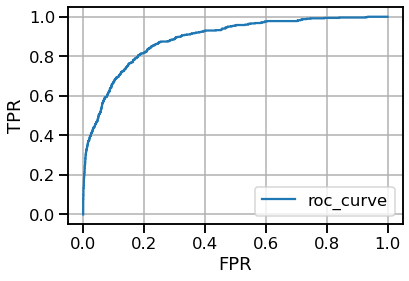

In [265]:
plt.plot(fpr, tpr, label='roc_curve')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [266]:
# extraction of importance
pd.set_option('display.max_rows', 80)
importance = pd.DataFrame(model.feature_importance(), index = df_X.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False)

,Importance
x1_term,459
x0_age,376
x10,358
x5,176
x56,147
x57,138
x55,117
x3,108
x4,70
x12,66


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

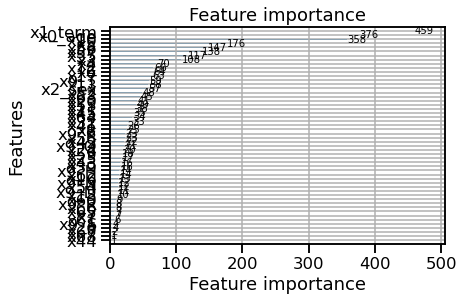

In [267]:
lgb.plot_importance(model)

In [280]:
preds = []
for x in preds:
    y_pred.append(np.argmax(x))

In [281]:
# accuracy_score(y_test, y_pred)

In [282]:
# recall_score(y_test, y_pred)

In [283]:
# precision_score(y_test, y_pred)

In [284]:
# f1_score(y_test, y_pred)